# Introduction

**This notebook is a guide for beginners into machine learning, linear regression to be more specific. There will be comments every step of the way so there is a clear understanding. We will be working on a mall's dataset and try to find insights on company's business decisions through exploratory data analysis and use linear regression models to predict sales.**

# Supervised vs Unsupervised Learning

**Machine learning is divided into supervised and unsupervised learning. In supervised learning, we train our model with data that we have previously acquired (labelled data). But, in unsupervised learning, our data is not labelled so our model must first self-discover any naturally occurring patterns in that training data set.**

**Supervised machine learning is divided into classification and regression. In classification, we predict discrete values, e.g. Yes/No, Customer will purchase/Won't purchase. But in regression, we predict continuous values, such as age, price, etc.**

# Linear Regression

**Linear regression is a regression model that estimates the relationship between one independent variable and one dependent variable using a straight line.**

**Example**

**You are a social researcher interested in the relationship between income and happiness. You survey 500 people whose incomes range from 15k to 75k and ask them to rank their happiness on a scale from 1 to 10.**
**Your independent variable (income) and dependent variable (happiness) are both quantitative, so you can do a regression analysis to see if there is a linear relationship between them.**

# Importing libraries and dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
sales_data = pd.read_csv("../input/bigmart-sales-data/Train.csv")
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Missing Values

In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**So, we have missing values in Item_Weight and Outlet_Size column. We need to impute these missing values with appropriate ones. We usually replace missing values in numerical columns with mean and in categorical columns with mode.**

In [ ]:
# Imputation
sales_data['Item_Weight'] = sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean())
sales_data['Outlet_Size'] = sales_data['Outlet_Size'].fillna(sales_data['Outlet_Size'].mode()[0])
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**All our missing values are imputed so now we're good to go.**

# Data Preprocessing

**We need to encode the categorical variables to numerical ones so our ML model understands the data.**

In [ ]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Low Fat, LF and low fat are all same and Regular and reg are same so we need to combine them.
sales_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Now we'll do label encoding to transform categorical values to numerical values
encoder = LabelEncoder()
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])
sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])
sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])
sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])
sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])
sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])
sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Exploratory Data Analysis

In [ ]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<AxesSubplot:>

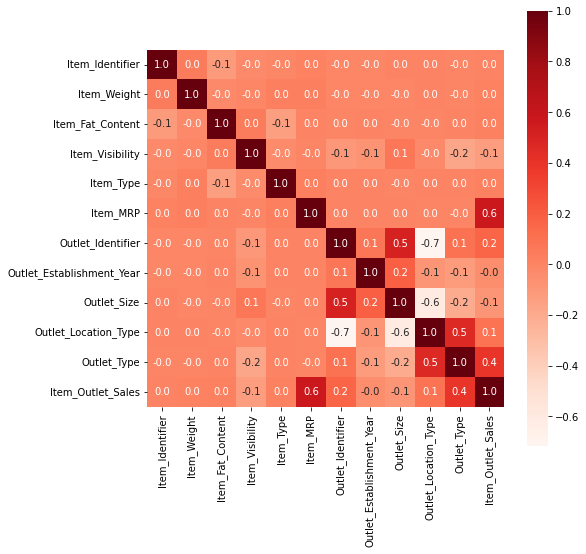

In [ ]:
# We can use a heatmap to check correlation between the variables.
corr = sales_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Reds')

**There isn't much correlation between the variables, except that if Item_MRP increases, Item_Outlet_Sales increases.**

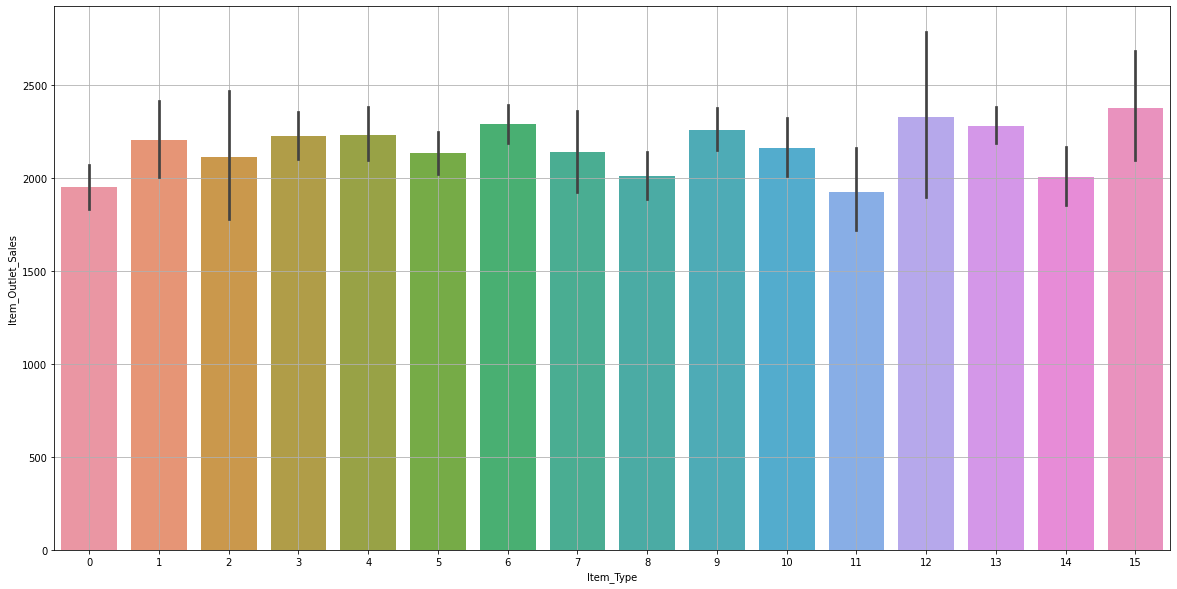

In [ ]:
# What type of item has most sales?
plt.figure(figsize=(20,10))
sns.barplot(x='Item_Type',y='Item_Outlet_Sales',data=sales_data)
plt.grid()

**From the illustration above, we can tell items like fruits and vegetables, household goods, snacks, starchy foods and seafood are more sold than the other items so the mall should consider keeping more of these items in inventory, give special offers and discounts to these goods so volume of sales increases more.**

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

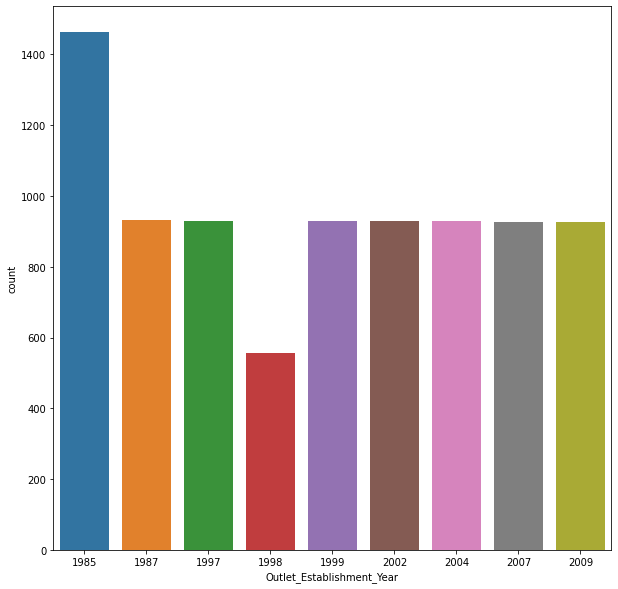

In [ ]:
# Which year were there highest sales?
plt.figure(figsize=(10,10))
sns.countplot(x="Outlet_Establishment_Year", data=sales_data)

**Interestingly, 1985, the debut year of the mall had the highest sales but from then on, sales volume was pretty much constant.**

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

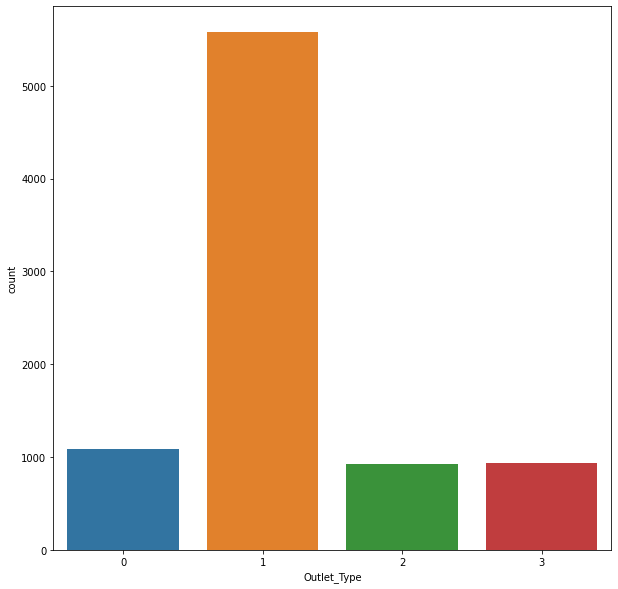

In [ ]:
# What type of outlet usually has more sales?
plt.figure(figsize=(10,10))
sns.countplot(x="Outlet_Type", data=sales_data)

**Supermarket Type1 have the most sales, much higher than other types so the mall owners should consider building more of these types in other locations.**

# Splitting Data

In [ ]:
# We need to split the data
X = sales_data.drop(columns='Item_Outlet_Sales',axis=1) # We need all the variables (columns) as independent variables so we're just dropping the target column to make things easier.
y = sales_data['Item_Outlet_Sales'] # Target

# Then we split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2) # 80% data will be used for training the model and rest 20% for testing.

In [ ]:
print(X.shape,X_train.shape)

(8523, 11) (6818, 11)


**As we can see, 6818 rows are used for testing out of 8523 which is about 80% of the data.**

# Model Building

**We're going to build a LinearRegression model and XGBoost model and compare. Finally, we will use the one with higher accuracy.**

In [ ]:
model1 = XGBRegressor()

# Now we need to train the model
model1.fit(X_train,y_train) # fitting means training

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

**First, we need to use the model to predict prices from the training data. Then, we check our model's accuracy using R squared error/ Mean Square error/ Mean Absolute error (for regression).**

In [ ]:
train_pred1 = model1.predict(X_train)
train_pred1

array([2172.693 , 2844.0671, 3308.6353, ..., 3363.3127, 1717.4066,
       2013.252 ], dtype=float32)

In [ ]:
train_pred2 = model2.predict(X_train)
train_pred2

array([2327.41867944, 3031.89278067, 3867.31973582, ..., 2567.89841379,
       2376.92087115, 3052.32198326])

In [ ]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_train,train_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 

R squared error for XGB Regressor: 0.8549833167058186


In [ ]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_train,train_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.514058329918831


**For training data, linear regressor is a better model for our project as it's R squared error is closer to 0. But we can still check with other models to find best model.**

**But keep in mind that we used training data to check accuracy. We need to check using test data for a better understanding.**

In [ ]:
test_pred1 = model1.predict(X_test)
test_pred1

array([2098.7969, 4360.376 , 1454.3608, ..., 2883.5608, 1158.3351,
       3164.4902], dtype=float32)

In [ ]:
test_pred2 = model2.predict(X_test)
test_pred2

array([2521.30878303, 3777.79279852, 1314.26315325, ..., 2255.36856828,
       4513.18525798, 3595.71438136])

In [ ]:
# Now we use R squared error (Basically comparing the original y_train and predictions and seeing difference/error)

# For XGBRegressor
RSQscore1 = metrics.r2_score(y_test,test_pred1)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for XGB Regressor:",RSQscore1) 

R squared error for XGB Regressor: 0.5191234777241828


In [ ]:
# For Linear Regressor
RSQscore2 = metrics.r2_score(y_test,test_pred2)

# Let's check

# The closer the errors are to 0, the more accurate our model is.
print("R squared error for Linear Regressor:",RSQscore2) 

R squared error for Linear Regressor: 0.49498230467978976


**Clearly, linear regressor is a better model for our project as it's R squared error is closer to 0. But we can still check with other models to find the best model.**

# Conclusion

**So basically the workflow is like this: Import libraries and dataset -> check for missing values -> perform necessary imputation -> data preprocessing -> exploratory data analysis -> split data -> train model -> check its accuracy -> improve model or try other ones.**

**To get better accuracy, try different models or use more training data.**